In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("C:/Users/Anika Sharma/Pictures/wallpapers/interstellar-9200x4320-10148.jpg")  
image=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

channels = ('r', 'g', 'b')
hist_color = {c: cv2.calcHist([image], [i], None, [256], [0, 256]) for i, c in enumerate(channels)}


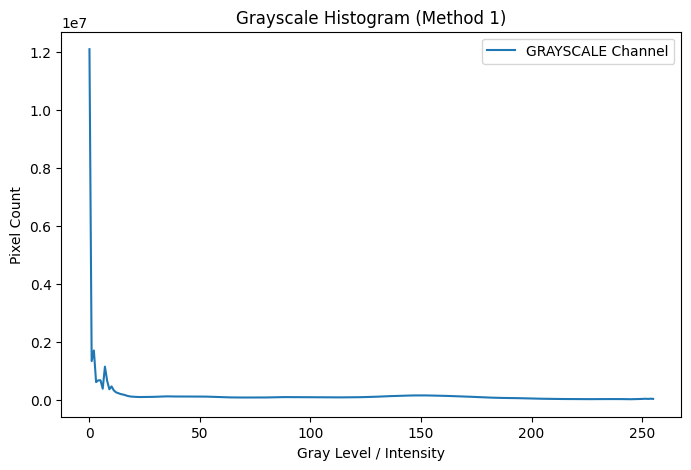

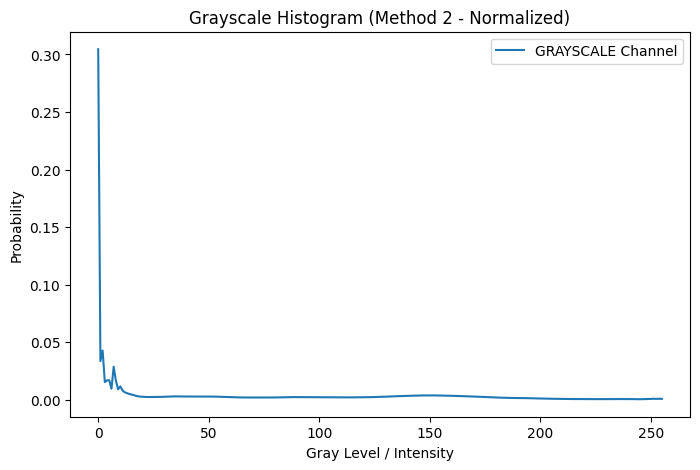

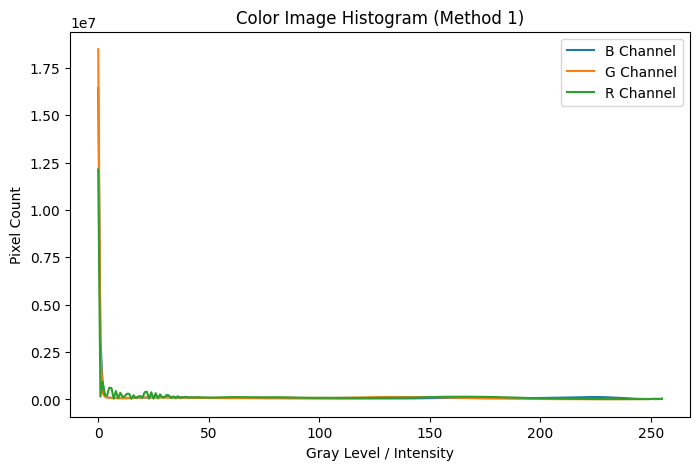

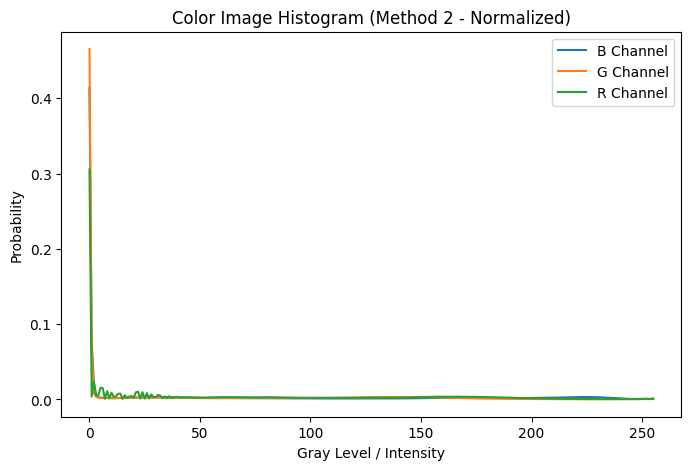

In [7]:
def normalize_hist(hist):
    return hist / hist.sum()

def plot_histogram(hist_data, title, method="count"):
    plt.figure(figsize=(8, 5))
    for c, hist in hist_data.items():
        plt.plot(hist if method == "count" else normalize_hist(hist), label=f"{c.upper()} Channel")
    plt.title(title)
    plt.xlabel("Gray Level / Intensity")
    plt.ylabel("Pixel Count" if method == "count" else "Probability")
    plt.legend()
    plt.show()

plot_histogram({'Grayscale': hist_gray}, "Grayscale Histogram (Method 1)")

plot_histogram({'Grayscale': hist_gray}, "Grayscale Histogram (Method 2 - Normalized)", method="probability")

plot_histogram(hist_color, "Color Image Histogram (Method 1)")

plot_histogram(hist_color, "Color Image Histogram (Method 2 - Normalized)", method="probability")



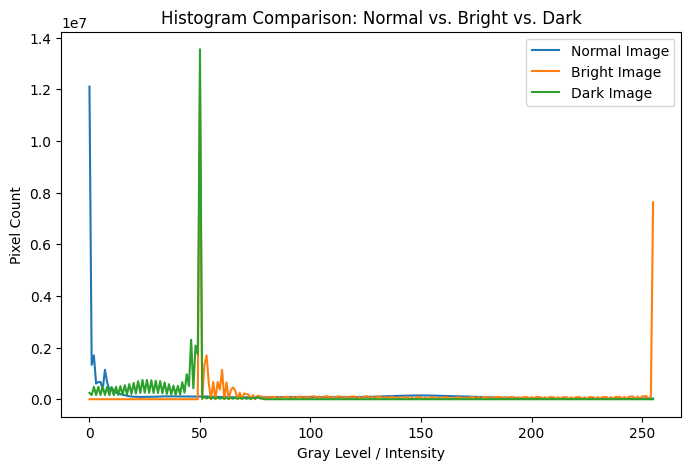

In [ ]:
bright_image = cv2.convertScaleAbs(gray_image, alpha=1.5, beta=50)  # Brighten
dark_image = cv2.convertScaleAbs(gray_image, alpha=0.5, beta=-50)  # Darken

# Compute histograms for bright and dark images
hist_bright = cv2.calcHist([bright_image], [0], None, [256], [0, 256])
hist_dark = cv2.calcHist([dark_image], [0], None, [256], [0, 256])

# Compare histograms of normal, bright, and dark images
plt.figure(figsize=(8, 5))
plt.plot(hist_gray, label="Normal Image")
plt.plot(hist_bright, label="Bright Image")
plt.plot(hist_dark, label="Dark Image")
plt.title("Histogram Comparison: Normal vs. Bright vs. Dark")
plt.xlabel("Gray Level / Intensity")
plt.ylabel("Pixel Count")
plt.legend()
plt.show()



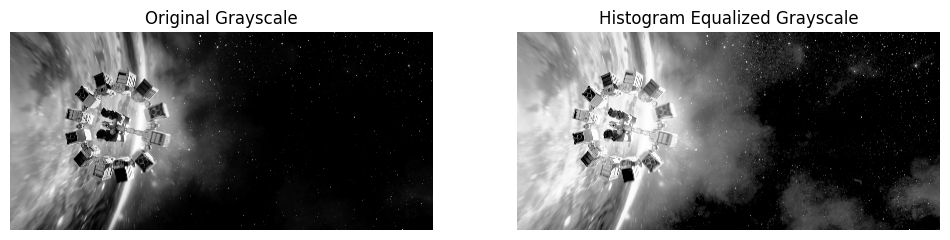

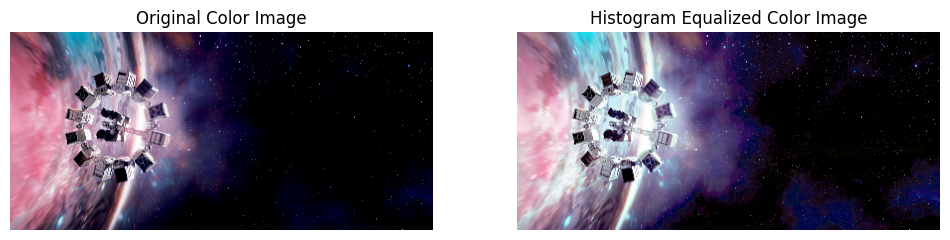

In [9]:
# Apply histogram equalization for contrast enhancement
equalized_gray = cv2.equalizeHist(gray_image)

# Equalize histogram for color image (each channel separately)
equalized_channels = [cv2.equalizeHist(image[:, :, i]) for i in range(3)]
equalized_color = cv2.merge(equalized_channels)

# Display original and equalized images
def show_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.show()

show_images(
    [gray_image, equalized_gray],
    ["Original Grayscale", "Histogram Equalized Grayscale"]
)

show_images(
    [image, equalized_color],
    ["Original Color Image", "Histogram Equalized Color Image"]
)

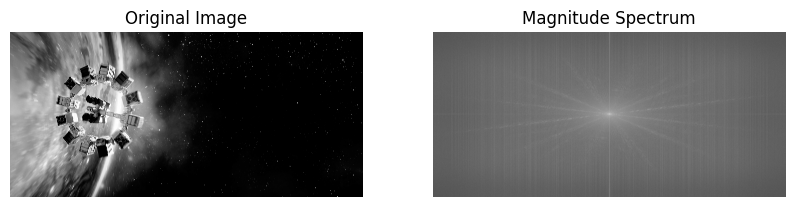

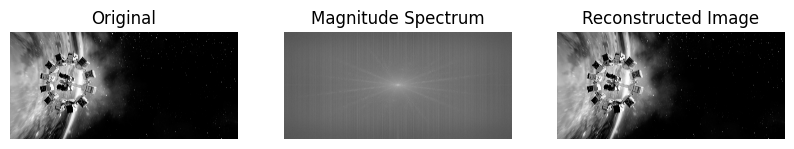

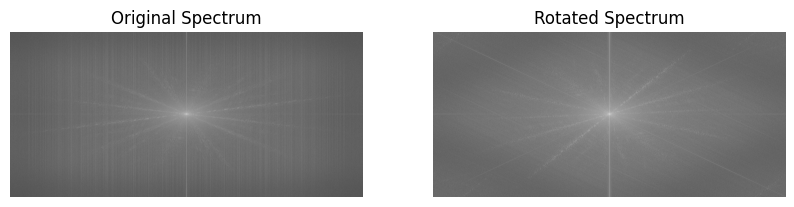

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread("C:/Users/Anika Sharma/Pictures/wallpapers/interstellar-9200x4320-10148.jpg", cv2.IMREAD_GRAYSCALE)

def compute_fft(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return fshift, magnitude_spectrum

#(IFFT)
def compute_ifft(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_reconstructed = np.fft.ifft2(f_ishift)
    img_reconstructed = np.abs(img_reconstructed)
    return img_reconstructed

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

#magnitude spectrum
fshift, magnitude_spectrum = compute_fft(image)
display_images([image, magnitude_spectrum], ["Original Image", "Magnitude Spectrum"])

#reconstructed image
img_reconstructed = compute_ifft(fshift)
display_images([image, magnitude_spectrum, img_reconstructed], ["Original", "Magnitude Spectrum", "Reconstructed Image"])

rotated_image = rotate_image(image, 45)

fshift_rot, magnitude_spectrum_rot = compute_fft(rotated_image)

display_images([magnitude_spectrum, magnitude_spectrum_rot], ["Original Spectrum", "Rotated Spectrum"])